### Confidence Inference

In [1]:
import math
import io

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [3]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [4]:
poll = pd.read_csv('poll.csv')

In [5]:
poll.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   vote    1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [6]:
poll.head()

,vote
0,Brown
1,Green
2,Brown
3,Brown
4,Brown


In [7]:
poll.vote.value_counts(normalize=True)

Brown    0.511
Green    0.489
Name: vote, dtype: float64

In [8]:
def sample(brown,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n)<brown,'Brown','Green')})

In [9]:
s=sample(0.51,n=1000)

In [10]:
s.vote.value_counts(normalize=True)

Brown    0.522
Green    0.478
Name: vote, dtype: float64

In [11]:
dist = pd.DataFrame([sample(0.51).vote.value_counts(normalize=True) for i in range(1000)])

In [12]:
dist.head()

,Brown,Green
vote,0.503,0.497
vote,0.493,0.507
vote,0.504,0.496
vote,0.499,0.501
vote,0.498,0.502


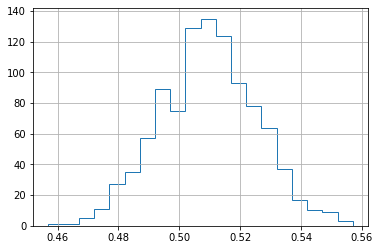

In [14]:
dist.Brown.hist(histtype='step',bins=20)

In [25]:
def samplinglist(brown,n=1000):
    return pd.DataFrame([sample(brown,n).vote.value_counts(normalize=True) for i in range(1000)])

In [26]:
def quantiles(brown,n=1000):
    dist = samplinglist(brown,n)
    return dist.Brown.quantile(0.025), dist.Brown.quantile(0.975)

In [27]:
quantiles(0.50)

(0.469, 0.53)

In [28]:
quantiles(0.40)

(0.371, 0.43)

In [29]:
quantiles(0.54)

(0.509, 0.569)

In [30]:
dist = samplinglist(0.50,10000)

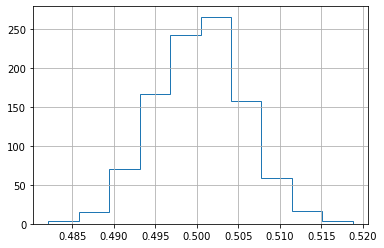

In [31]:
dist.Brown.hist(histtype='step')

In [32]:
import math
import io

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

import scipy.stats
import scipy.optimize
import scipy.spatial

In [33]:
pop = pd.read_csv('grades.csv')

In [34]:
pop.head()

,grade
0,3.648651
1,5.959915
2,7.387370
3,4.047515
4,2.846912


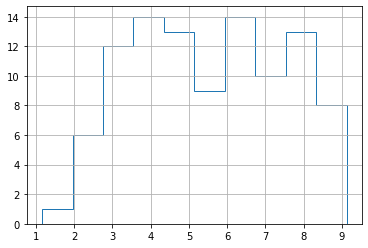

In [35]:
pop.grade.hist(histtype= 'step')

In [36]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


In [37]:
pop.sample(100,replace=True).describe()

,grade
count,100.000000
mean,5.668630
std,2.103785
min,1.160899
25%,4.020809
50%,5.799635
75%,7.723574
max,9.120705


In [38]:
bootstrap = pd.DataFrame({'meangrade':[pop.sample(100,replace=True).grade.mean() for i in range(1000)]})

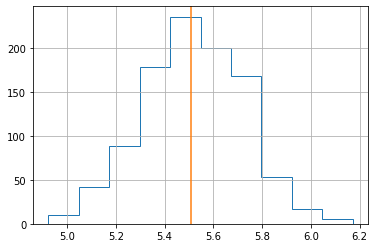

In [39]:
bootstrap.meangrade.hist(histtype='step')
pp.axvline(pop.grade.mean(),color='C1')

In [40]:
bootstrap.meangrade.quantile(0.025), bootstrap.meangrade.quantile(0.975)

(5.11809347775425, 5.9181685483875)

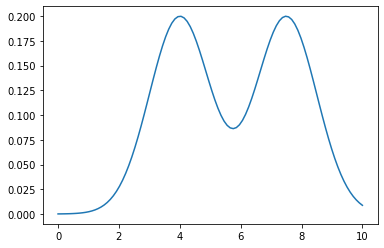

In [41]:
n1 = scipy.stats.norm(7.5,1)
n2 = scipy.stats.norm(4,1)

x= np.linspace(0,10,100)
pp.plot(x,0.5*n1.pdf(x)+0.5*n2.pdf(x))

In [42]:
def draw():
    while True:
        v = n1.rvs() if np.random.rand() < 0.5 else n2.rvs()
        if 0 <= v <= 10:
            return v

In [43]:
draw()

7.502084902948014

In [44]:
def dataset(n=100):
    return pd.DataFrame({'grade': [draw() for i in range(n)]})

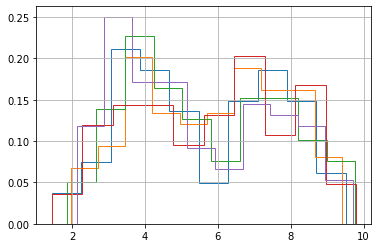

In [45]:
for i in range(5):
    dataset(100).grade.hist(histtype='step',density=True)

In [46]:
means = pd.DataFrame({'meangrade':[dataset(100).grade.mean() for i in range(1000)]})

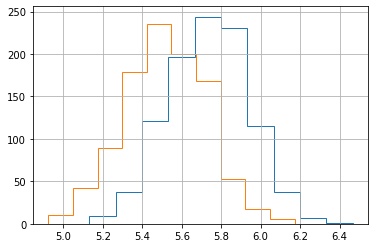

In [47]:
means.meangrade.hist(histtype='step')
bootstrap.meangrade.hist(histtype='step')